In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from skimage.color import gray2rgb
import shap
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array

2023-06-21 11:13:02.154337: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-21 11:13:02.221640: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-21 11:13:02.222446: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-21 11:13:03.297151: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/valentini/miniconda3/envs/deep/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to Tr

In [2]:


# Load the FashionMNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


2023-06-21 11:13:30.469851: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/5
1875/1875 [==============================] - 30s 15ms/step - loss: 0.4095 - accuracy: 0.8530 - val_loss: 0.3404 - val_accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2653 - accuracy: 0.9038 - val_loss: 0.2962 - val_accuracy: 0.8874
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2187 - accuracy: 0.9196 - val_loss: 0.2530 - val_accuracy: 0.9081
Epoch 4/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1834 - accuracy: 0.9325 - val_loss: 0.2335 - val_accuracy: 0.9181
Epoch 5/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1524 - accuracy: 0.9439 - val_loss: 0.2492 - val_accuracy: 0.9146


In [9]:

# Select two examples
example1_idx = np.argmax(y_test == 0)
example2_idx = np.argmax(y_test == 1)

example1 = X_test[example1_idx]
example2 = X_test[example2_idx]

# Convert grayscale image to RGB
example2_rgb = gray2rgb(example2.reshape(28, 28))

# Make predictions for the examples
example1_pred = model.predict(example1.reshape(1, 28, 28, 1))
example2_pred = model.predict(example2.reshape(1, 28, 28, 1))

# Get the predicted classes and probabilities
example1_class = np.argmax(example1_pred)
example1_prob = example1_pred[0, example1_class]
example1_pred_copy = example1_pred
#if we do the sort we lost information about the position of the class 
example1_class_mod = np.delete(example1_pred_copy, np.where(example1_pred_copy == example1_class))

example1_second_prob = np.argmax(example1_pred_copy)
example1_second_prob = example1_pred_copy[0, example1_second_prob]


example1_least_prob = np.argmin(example1_pred_copy)
example1_least_prob = example1_pred_copy[0, example1_least_prob]

#example1_second_prob = np.sort(example1_pred)[0, -2]
#example1_least_prob = np.sort(example1_pred)[0, -1]

example2_class = np.argmax(example2_pred)
example2_pred_copy = example2_pred
example2_prob = example2_pred[0, example2_class]

example2_class_mod = np.delete(example2_pred_copy, np.where(example2_pred_copy == example2_class))

example2_second_prob = np.argmax(example2_pred_copy)
example2_second_prob = example2_pred_copy[0, example2_second_prob]

example2_least_prob = np.argmin(example2_pred_copy)
example2_least_prob = example2_pred_copy[0, example2_least_prob]

#example2_second_prob = np.sort(example2_pred)[0, -2]
#example2_least_prob = np.sort(example2_pred)[0, -1]

print(f"Example 1: True Class - {class_names[0]}")
print(f"           Predicted Class - {class_names[example1_class]}")
print(f"           Probability - {example1_prob:.4f}")
print(f"           Second Most Likely Probability - {example1_second_prob:.4f}")
print(f"           Least Likely Probability - {example1_least_prob:.4f}")
print()
print(f"Example 2: True Class - {class_names[1]}")
print(f"           Predicted Class - {class_names[example2_class]}")
print(f"           Probability - {example2_prob:.4f}")
print(f"           Second Most Likely Probability - {example2_second_prob:.4f}")
print(f"           Least Likely Probability - {example2_least_prob:.4f}")
print()


1/1 [==============================] - 0s 15ms/step
Example 1: True Class - T-shirt/top
           Predicted Class - T-shirt/top
           Probability - 0.9859
           Second Most Likely Probability - 0.9859
           Least Likely Probability - 0.0000

Example 2: True Class - Trouser
           Predicted Class - Trouser
           Probability - 1.0000
           Second Most Likely Probability - 1.0000
           Least Likely Probability - 0.0000



`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


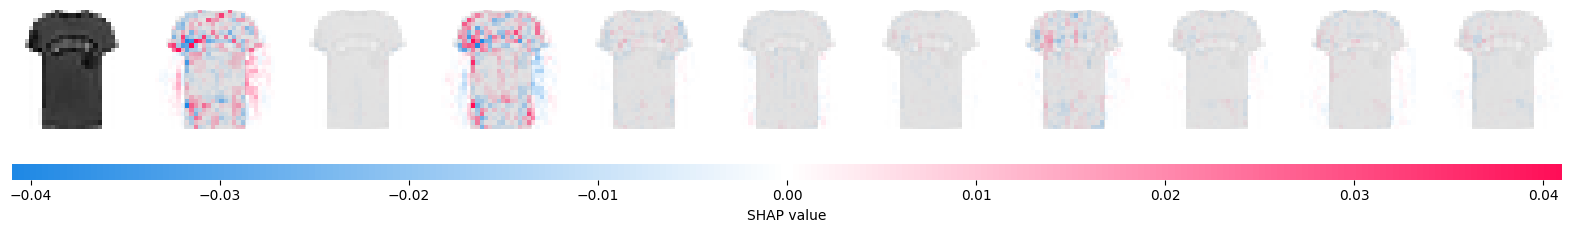

In [4]:

# SHAP Explanation
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]
explainer = shap.GradientExplainer(model, background)
shap_values = explainer.shap_values(example1.reshape(1, 28, 28, 1))
shap.image_plot(shap_values, -example1.reshape(1, 28, 28, 1))

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


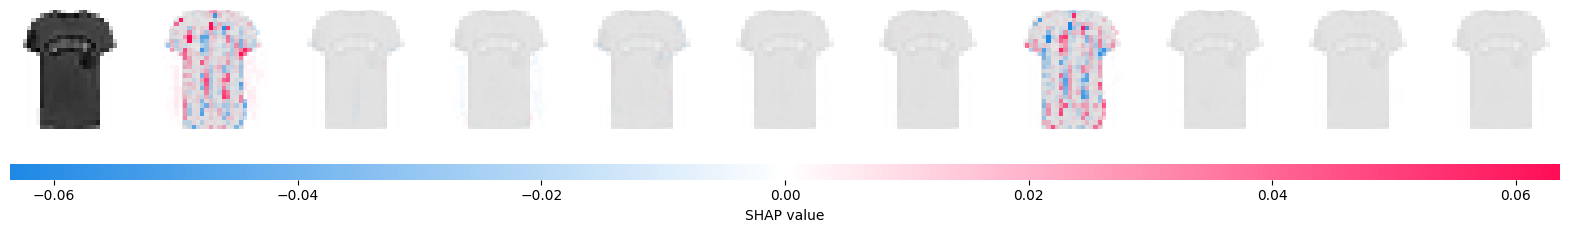

In [9]:
# DeepLIFT Explanation
explainer = shap.DeepExplainer(model, background)
deeplift_values = explainer.shap_values(example1.reshape(1, 28, 28, 1))
shap.image_plot(deeplift_values, -example1.reshape(1, 28, 28, 1))

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


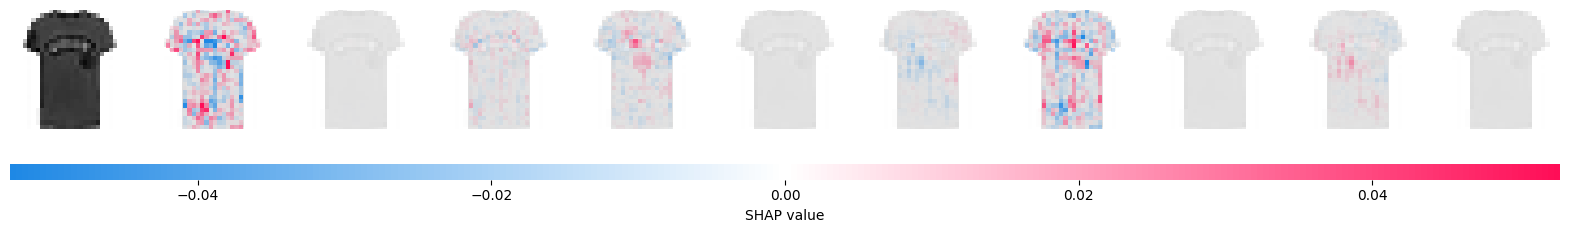

In [10]:
# Integrated Gradients Explanation
baseline = np.zeros_like(example1).reshape(1, 28, 28, 1)
explainer = shap.GradientExplainer(model, baseline)
shap_values = explainer.shap_values(example1.reshape(1, 28, 28, 1))
shap.image_plot(shap_values, -example1.reshape(1, 28, 28, 1))

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


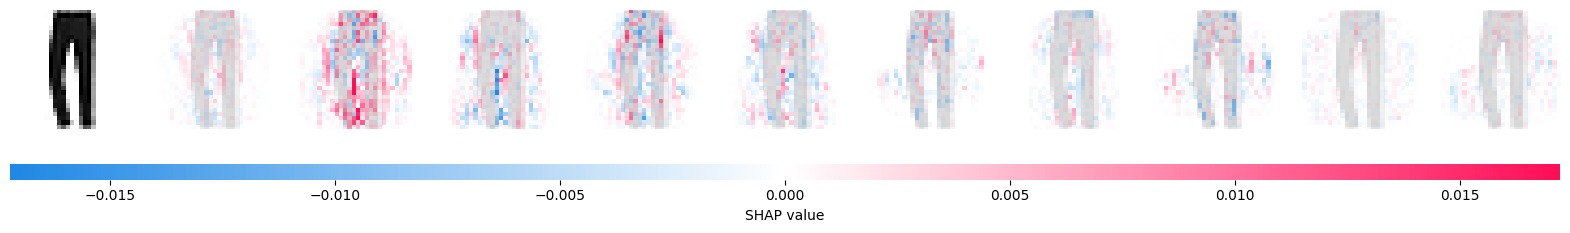

In [12]:
# SHAP Explanation
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]
explainer = shap.GradientExplainer(model, background)
shap_values = explainer.shap_values(example2.reshape(1, 28, 28, 1))
shap.image_plot(shap_values, -example2.reshape(1, 28, 28, 1))

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


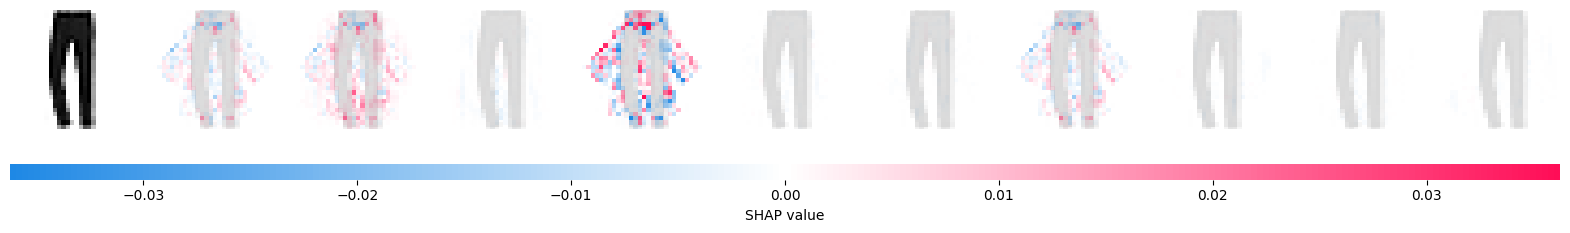

In [5]:
# DeepLIFT Explanation
explainer = shap.DeepExplainer(model, background)
deeplift_values = explainer.shap_values(example2.reshape(1, 28, 28, 1))
shap.image_plot(deeplift_values, -example2.reshape(1, 28, 28, 1))

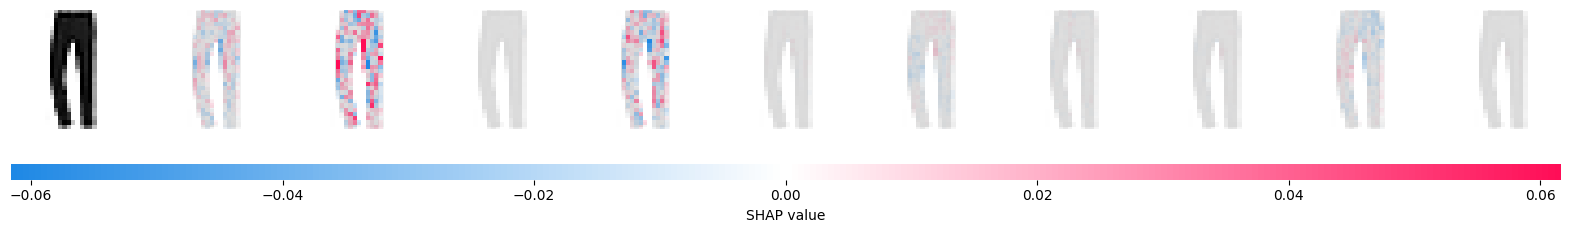

In [6]:
# Integrated Gradients Explanation
baseline = np.zeros_like(example2).reshape(1, 28, 28, 1)
explainer = shap.GradientExplainer(model, baseline)
shap_values = explainer.shap_values(example2.reshape(1, 28, 28, 1))
shap.image_plot(shap_values, -example2.reshape(1, 28, 28, 1))